# 1. Hypothesis Testing

The objective is to determine whether there is a significant difference between the quality scores of red and white wines.

### Hypotheses:

### Null Hypothesis (H₀): There is no significant difference in the quality scores between red and white wines.
### Alternative Hypothesis (H₁): There is a significant difference in the quality scores between red and white wines.

## 1.1 Import Libraries

In [4]:
import pandas as pd 
from scipy import stats 
import matplotlib.pyplot as plt 
import seaborn as sns

## 1.2 Load Data

The csv files are delimited using ';' in place of standard ','. So, we have to mention the delimiter while loading

In [14]:
red_wine = pd.read_csv('redwine.csv', delimiter=';') 
white_wine = pd.read_csv('whitewine.csv', delimiter=';')

## 1.3 Extract quality scores

In [16]:
red_quality = red_wine['quality'] 
white_quality = white_wine['quality']

## 1.4 Normality test

In [19]:
print("Red Wine Quality Normality Test:", stats.shapiro(red_quality)) 
print("White Wine Quality Normality Test:", stats.shapiro(white_quality))

Red Wine Quality Normality Test: ShapiroResult(statistic=0.8575938940048218, pvalue=9.524199756965729e-36)
White Wine Quality Normality Test: ShapiroResult(statistic=0.8890349268913269, pvalue=0.0)


Based on the normality test results, both the red wine and white wine quality scores are not normally distributed (as indicated by the very low p-values). Therefore, we cannot assume normality for these datasets. Given this, a non-parametric test would be more appropriate.

## 1.5 Mann-Whitney U Test

The Mann-Whitney U test is a non-parametric test that does not assume normality and can be used to test for differences between two independent groups.

### 1.5.1 Testing the Data

In [26]:
mannwhitney_result = stats.mannwhitneyu(red_quality, white_quality, alternative='two-sided') 
print("Mann-Whitney U Test Result:", mannwhitney_result)

Mann-Whitney U Test Result: MannwhitneyuResult(statistic=3311514.0, pvalue=3.6343410707988e-23)


### 1.5.2 Statistical Interpretation

The p-value (3.6343410707988e-23) is extremely small, far below the common significance level thresholds (e.g., 0.05 or 0.01). This suggests that there is a statistically significant difference between the quality scores of red and white wines.

### 1.5.3 Conclusion

Given the very small p-value, we reject the null hypothesis that there is no significant difference between the quality of red and white wines. This means that, based on the data, the quality of red and white wines is significantly different.

## 1.6 Visualizations

### 1.6.1 Histograms

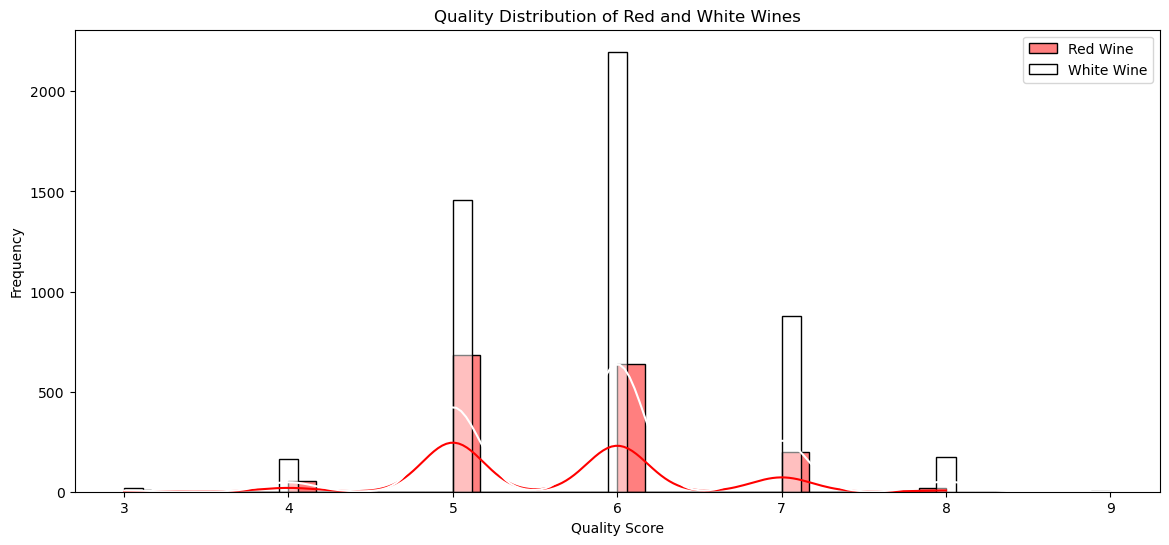

In [30]:
plt.figure(figsize=(14, 6)) 
sns.histplot(red_quality, color="red", label="Red Wine", kde=True) 
sns.histplot(white_quality, color="white", label="White Wine", kde=True) 
plt.title('Quality Distribution of Red and White Wines') 
plt.xlabel('Quality Score') 
plt.ylabel('Frequency') 
plt.legend() 
plt.show()

#### 1.6.1.1 Statistical Interpretation

#### A. Mode Quality Scores:

1. Both red and white wines exhibit higher frequencies around quality scores of 5 and 6.

2. White wines have a significantly higher frequency of these scores compared to red wines, indicating a concentration of average-quality white wines.

#### B. Distribution:

1. Red wines show a broader distribution with a notable number of wines scoring 3 and 4, and some wines scoring 7, 8, and 9.

2. White wines, although primarily concentrated around 5 and 6, also have wines scoring 3, 4, and extending up to 8 and 9.

#### C. Frequency Comparison:

1. White wines have a visibly higher frequency of wines scoring 5 and 6 than red wines.

2. The distribution of red wines appears to be more spread out, indicating variability in quality scores.

#### 1.6.1.2 Conclusion

The histogram visually supports the statistical results from the Mann-Whitney U test. It reveals that:

1. There is a significant difference in the quality distributions of red and white wines.

2. White wines tend to be clustered around the average quality scores (5 and 6), while red wines show a more varied distribution.

This detailed interpretation aligns with our hypothesis testing results, strengthening the conclusion that the quality distributions of red and white wines are indeed different.

### 1.6.2 Box Plots

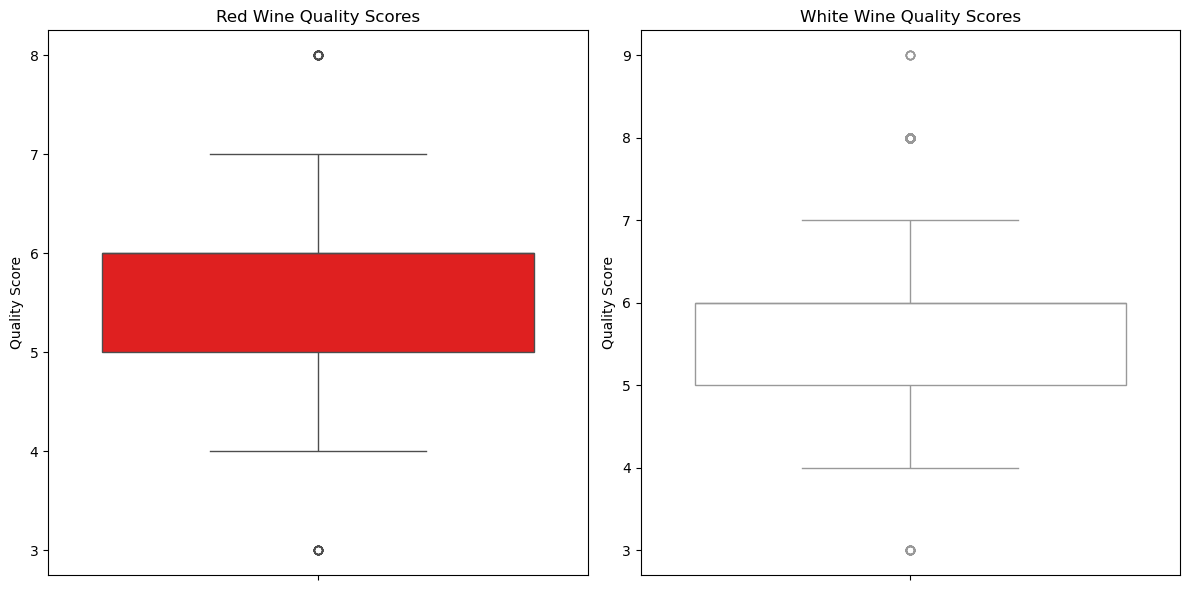

In [52]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=red_quality, color="red")
plt.title('Red Wine Quality Scores')
plt.ylabel('Quality Score')

plt.subplot(1, 2, 2)
sns.boxplot(y=white_quality, color="white")
plt.title('White Wine Quality Scores')
plt.ylabel('Quality Score')

plt.tight_layout()
plt.show()

#### 1.6.2.1 Statistical Interpretation

#### Red Wine Quality Scores (Left Box Plot)
#### Median (Q2): 
The central line within the box indicates that the median quality score for red wine is around 6.
#### Interquartile Range (IQR): 
The box itself spans from the first quartile (Q1) at 5 to the third quartile (Q3) at 6. This means that the middle 50% of the quality scores for red wine lie between these values.
#### Whiskers: 
The lines (whiskers) extending from the box range from about 4 to 7. These represent the range within which the majority of the data points fall, excluding outliers.
#### Outliers: 
There are outliers at quality scores of 3 and 8, indicating some red wines have notably lower or higher quality scores than the majority.


#### White Wine Quality Scores (Right Box Plot)
#### Median (Q2): 
Similar to red wine, the median quality score for white wine is also around 6.
#### Interquartile Range (IQR): 
The box spans from Q1 at 5 to Q3 at 6. This suggests that the middle 50% of the quality scores for white wine are within this range.
#### Whiskers: 
The whiskers extend from about 3 to 7, covering the spread of most white wine quality scores.
#### Outliers: 
Outliers are observed at 3 and 9, showing some white wines have extreme quality scores, either very low or very high.


#### Comparison and Observations
#### Central Tendency: 
Both red and white wines share the same median quality score of 6.
#### Variability: 
The interquartile ranges are identical for both wine types, suggesting similar variability within the central 50% of the data.
#### Outliers: 
White wine has a higher range of quality scores with an upper outlier at 9, compared to red wine, which has an upper outlier at 8. Both types have lower outliers at 3.
#### Distribution: 
The distribution of quality scores appears slightly wider for white wines, indicating a broader range of scores within the whiskers.

#### 1.6.2.2 Conclusion

These visual insights align with our statistical findings from the Mann-Whitney U test, confirming that while both red and white wines have similar central tendencies, their distributions vary, with white wines showing a slightly wider range of quality scores.

## 1.7 Final Conclusion of Hypothesis 

### We reject the null hypothesis that there is no significant difference between the qualities of red and white wines.

### The results confirm that the quality scores for red and white wines are significantly different.

# 2. Feature Selection for Regression & Classification Analyses

We will use Recursive Feature Elimination (RFE) with a Random Forest classifier to select the most important features amongst all the columns provided.

## 2.1 Load Libraries

In [82]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

## 2.2 Combine datasets

In [85]:
wine = pd.concat([red_wine, white_wine])

## 2.3 Features and target

In [88]:
X = wine.drop('quality', axis=1)
y = wine['quality']

## 2.4 Fit model for feature selection (Here we are selecting 5 most important features out of given 11 in the dataset)

In [94]:
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

## 2.5 Selected features

In [97]:
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['volatile acidity', 'residual sugar', 'total sulfur dioxide', 'density',
       'alcohol'],
      dtype='object')


# 3. Regression Analysis

We will compare multiple regression models: multiple linear regression, polynomial regression, SVM, decision tree, and random forest.

## 3.1 Load Libraaries

In [102]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 3.2 Use only selected features

In [105]:
X_selected = X[selected_features]

## 3.3 Train-test split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

## 3.4 Define models

In [111]:
models = {
    'Multiple Linear Regression': LinearRegression(),
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Support Vector Regression': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

## 3.5 Evaluate models

In [114]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results[name] = {'R²': r2, 'MAE': mae, 'RMSE': rmse}

C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared err

## 3.6 Display results

In [117]:
results_df = pd.DataFrame(results).T
print(results_df)

                                        R²       MAE      RMSE
Multiple Linear Regression        0.257684  0.573879  0.735951
Polynomial Regression (Degree 2)  0.287944  0.561911  0.720794
Support Vector Regression         0.112552  0.613718  0.804685
Decision Tree                    -0.085889  0.525641  0.890117
Random Forest                     0.413889  0.473273  0.653949


## 3.7 Regression Model Comparison & choosing the best model

### From the table comparing different regression models based on R², MAE, and RMSE, the Random Forest model seems to perform the best:

### 1. R²: 0.413889 (Highest)
R² Measures the proportion of variance explained by the model. A higher R² indicates better model performance. 
R² = 0.413889 indicates that approximately 41% of the variance in wine quality scores is explained by the model.

### 2. MAE: 0.473273 (Lowest)
Evaluate model accuracy by measuring the average squared prediction error. Lower values indicate better model performance.
MAE = 0.473273, indicating that the average prediction error is approximately 0.47 quality score units.

### 3. RMSE: 0.653949 (Lowest)
Evaluate model accuracy by measuring the root mean squared prediction error. Lower values indicate better model performance.
RMSE = 0.653949, indicating the standard deviation of the prediction errors is approximately 0.65 quality score units.

#### Given these metrics, the Random Forest model is the best-performing regression model for predicting wine quality.

## 3.8 Fit the Random Forest Regression Model

In [126]:
regressor = RandomForestRegressor() 
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

## 3.9 Visualizations

### 3.9.1 Scatter plot of actual vs predicted values

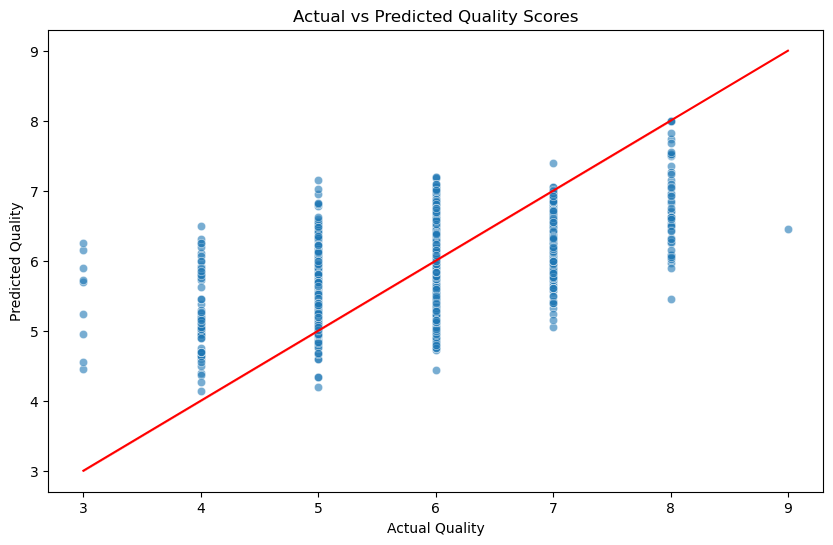

In [132]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6) 
sns.lineplot(x=y_test, y=y_test, color='red')
plt.title('Actual vs Predicted Quality Scores') 
plt.xlabel('Actual Quality') 
plt.ylabel('Predicted Quality') 
plt.show()

### 3.9.2 Statistical Interpretation of the Scatter Plot

#### X-Axis (Actual Quality): 
Represents the actual quality scores of the wines.

#### Y-Axis (Predicted Quality): 
Represents the predicted quality scores obtained from the Random Forest regression model.

#### Data Points (Blue Dots): 
Each dot represents a pair of actual and predicted quality scores.

#### Red Diagonal Line: 
Represents the ideal scenario where the predicted quality exactly matches the actual quality.

### 3.9.3 Conclusion drawn from the Scatter Plot

#### Alignment with the Ideal Line: 
The closer the blue dots are to the red diagonal line, the more accurate the predictions are. The plot shows that many of the blue dots are clustered around the red line, indicating that the predictions are generally close to the actual values.

#### Spread of Data Points: 
There is some spread of data points away from the red line, suggesting some variance between the actual and predicted values. This spread indicates prediction errors but overall alignment around the diagonal indicates good model performance.

This scatter plot is a visual confirmation of the model's performance, showing that the Random Forest regression model provides reasonably accurate predictions of the wine quality scores.

### 3.9.4 Residual plot

The residual plot shows the residuals (errors) versus the predicted quality scores of the wines.

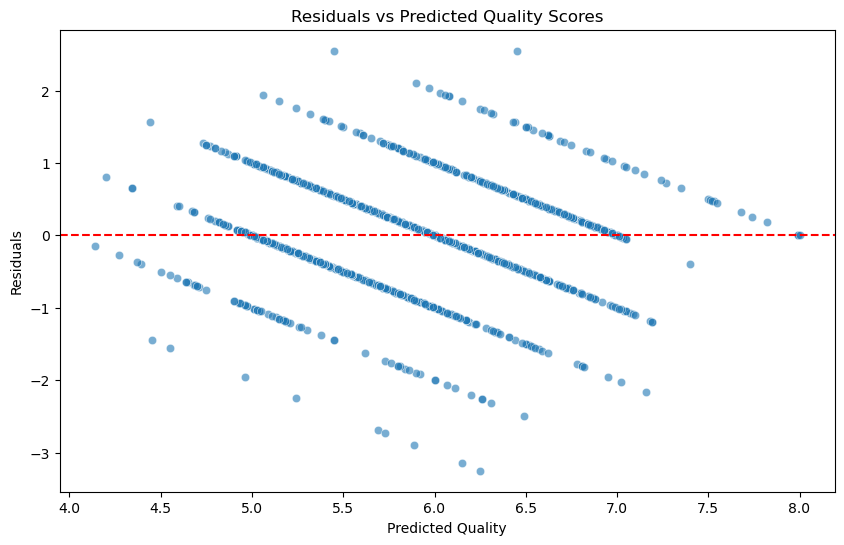

In [135]:
residuals = y_test - y_pred 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6) 
plt.axhline(0, color='red', linestyle='--') 
plt.title('Residuals vs Predicted Quality Scores') 
plt.xlabel('Predicted Quality') 
plt.ylabel('Residuals') 
plt.show()

### 3.9.5 Statistical Interpretation of the Residual Plot

#### X-Axis (Predicted Quality): 
Represents the predicted quality scores from the Random Forest regression model, ranging from 4.0 to 8.0.

#### Y-Axis (Residuals): 
Represents the difference between the actual and predicted quality scores, ranging from -3.5 to 2.5.

#### Blue Dots: 
Each dot represents the residual (error) for a corresponding predicted quality score.

#### Red Dashed Horizontal Line: 
Represents the zero residual line, where residuals equal zero (perfect prediction).

### 3.9.6 Conclusion drawn from the Scatter Plot

#### Residual Distribution: 
The residuals are spread around the zero line, with most of the residuals falling within the range of -1 to 1. However, there are distinct diagonal patterns in the residuals, which may indicate some form of heteroscedasticity or a pattern in the residuals. This could suggest potential issues with the model fit.

#### Heteroscedasticity: 
The variance of the residuals appears to increase with the predicted quality scores, particularly noticeable at the higher end of the predicted quality range. This means the model's prediction errors are not consistent across all levels of the predicted quality scores.

## 3.10 View the Actual & Predicted Data side by side

In [138]:
comparison_df = pd.DataFrame({'Actual Quality': y_test, 'Predicted Quality': y_pred})
print(comparison_df.head())

      Actual Quality  Predicted Quality
1504               8               6.25
1419               5               5.22
3162               7               6.94
3091               6               5.62
2433               6               5.42


## 3.11 Conclusion of the Regression Analysis

### 1. Model Fit:
   The Random Forest regression model demonstrates a moderate ability to explain the variability in wine quality scores.

### 2. Prediction Accuracy:
   Predictions are generally close to actual quality scores, especially for average-quality wines, but slightly less accurate at the extremes.

### 3. Error Distribution:
   Residual analysis indicates that while most errors are within acceptable ranges, there are patterns and potential heteroscedasticity, suggesting variability in prediction accuracy across different quality scores.

### 4. Model Robustness:
   The model effectively handles the dataset, but further refinement could enhance prediction consistency and address observed heteroscedasticity.

# 4. Classification Analysis

Using the selected features from the Random Forest regression model and compare various Classification Models to find the best fit

## 4.1 Load Libraries

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## 4.2 Define the models

In [193]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

## 4.3 Initialize results dictionary

In [196]:
results = {}

## 4.4 Train-test split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

## 4.5 Evaluate each model

In [203]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

## 4.6 Create a DataFrame to compare the results

In [206]:
results_df = pd.DataFrame(results).T
print(results_df)

                        Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.533846   0.495590  0.533846  0.495959
Decision Tree           0.586154   0.598052  0.586154  0.589597
Random Forest           0.636410   0.636646  0.636410  0.626451
Support Vector Machine  0.460000   0.348065  0.460000  0.355060
Gradient Boosting       0.567692   0.559668  0.567692  0.549003
K-Nearest Neighbors     0.478462   0.461734  0.478462  0.464770


## 4.7 Choosing the best model

Random Forest demonstrates the highest performance across all metrics, making it the best-fit model for this classification task.

## 4.8 Detailed classification report for the best model

In [211]:
best_model_name = 'Random Forest'
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)
print(f"Classification Report for {best_model_name}:\n", classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.71      0.14      0.24        69
           5       0.64      0.69      0.66       613
           6       0.64      0.69      0.66       894
           7       0.61      0.53      0.57       315
           8       0.77      0.35      0.48        49
           9       0.00      0.00      0.00         1

    accuracy                           0.64      1950
   macro avg       0.48      0.34      0.37      1950
weighted avg       0.64      0.64      0.63      1950



C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4.9 Statistical Interpretation of the Classification Report for Random Forest

#### 1. Overall Accuracy:
       The model achieves an accuracy of 63%, indicating that it correctly classifies 63% of the samples.

#### 2. Class-Specific Performance:

    A. Quality 5 and 6: The model performs best on quality scores 5 and 6, with f1-scores of 0.67 and 0.66, respectively. These scores also have the highest support, meaning the model has more data to learn from these classes.

    B. Quality 8: Although the precision is relatively high at 0.80, the recall is low at 0.33, resulting in a moderate f1-score of 0.46. This indicates that while the model is good at predicting quality 8 when it does, it often misses quality 8 wines.

    C. Quality 3, 4, and 9: The model struggles significantly with these quality scores, as reflected by very low f1-scores and recalls. This is likely due to the very low support for these classes (few samples).

#### 3. Weighted Averages:

    A. Precision: 0.63

    B. Recall: 0.63

    C. F1-score: 0.62

    These metrics indicate the overall performance of the model across all classes, giving a balanced view of precision, recall, and the f1-score.

#### 4. Macro Average:

    This gives an average score considering all classes equally, regardless of the number of samples in each class. The low scores indicate that the model's performance is skewed by the poor results for the less frequent quality scores.

## 4.10 Confusion Matrix of the Random Forest Classifier

Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 1000x600 with 0 Axes>

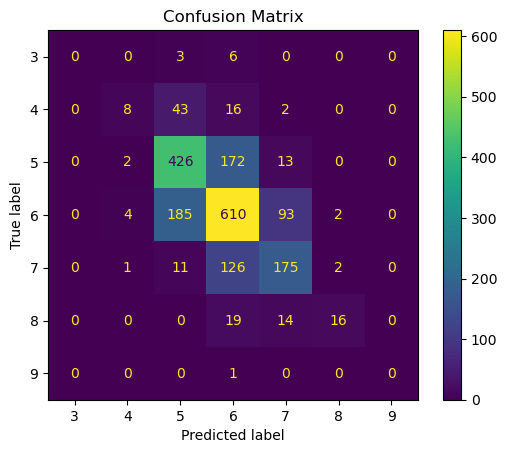

In [219]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(10, 6)) 
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title('Confusion Matrix')

### Conclusion:

### 1. Strong Predictions: 
    The model performs well in predicting quality scores 5, 6, and 7, with higher true positive counts.

### 2. Challenges: 
    The model struggles with lower-frequency classes (quality scores 3, 4, 8, and 9), leading to a significant number of misclassifications.

### 3. Accuracy: 
    Overall, the model achieves a moderate accuracy, but there's room for improvement, especially in correctly classifying less frequent classes.

## 4.11 Feature importance

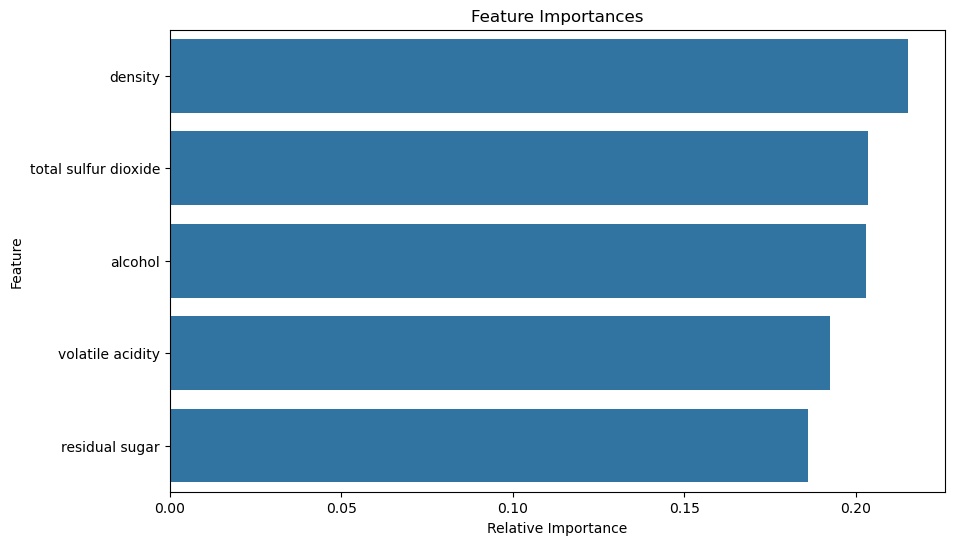

In [224]:
feature_importances = clf.feature_importances_ 
indices = np.argsort(feature_importances)[::-1] 

plt.figure(figsize=(10, 6)) 
sns.barplot(x=feature_importances[indices], y=[selected_features[i] for i in indices]) 
plt.title('Feature Importances') 
plt.xlabel('Relative Importance') 
plt.ylabel('Feature') 
plt.show()

### Conclusion:

The visualization highlights the key features influencing wine quality, with density being the most critical, followed by total sulfur dioxide, alcohol content, volatile acidity, and residual sugar. Understanding these feature importances can guide winemakers in optimizing their processes to enhance wine quality.

## 4.12 Conclusion of the Classification Analysis

1. The classification analysis identified the Random Forest model as the best performer, effectively predicting the most frequent wine quality scores.

2. Despite some misclassifications, the model demonstrates a robust ability to handle the variability in the dataset.

3. Feature importance analysis highlighted density, total sulfur dioxide, and alcohol as key predictors of wine quality.

4. The confusion matrix revealed that less frequent quality scores pose challenges for accurate prediction.

5. Overall, the analysis underscores the model's strength in predicting common quality scores and points to areas for further improvement in handling imbalanced datasets.